In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py


In [2]:
base_url ='https://results.eci.gov.in/PcResultGenJune2024/index.htm'
url = "https://results.eci.gov.in/PcResultGenJune2024/"

In [3]:
response = requests.get(base_url)

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
table1 = soup.find('table', class_ = 'table')

In [6]:
url_list = []

# Iterate through the first part of the URL range (1 to 39)
for code in range(1, 40):
    # Create a separate range for the second part of the URL
    for num in range(1, 6):  # Adjusted range for the second part (1 to 5)
        # Union territories
        url_ut = f"{url}statewiseU{code:02}{num}.htm"
        response_ut = requests.get(url_ut)
        if response_ut.status_code == 200:
            print(f"Found: {url_ut}")
            url_list.append(url_ut)
            # Replace with your processing code
        
        # States
        url_st = f"{base_url}statewiseS{code:02}{num}.htm"
        response_st = requests.get(url_st)
        if response_st.status_code == 200:
            print(f"Found: {url_st}")
            url_list.append(url_st)
            # Replace with your processing code
        else:
            print(f"Not found: {url_st}")

Found: https://results.eci.gov.in/PcResultGenJune2024/statewiseU011.htm
Not found: https://results.eci.gov.in/PcResultGenJune2024/index.htmstatewiseS011.htm
Not found: https://results.eci.gov.in/PcResultGenJune2024/index.htmstatewiseS012.htm
Not found: https://results.eci.gov.in/PcResultGenJune2024/index.htmstatewiseS013.htm
Not found: https://results.eci.gov.in/PcResultGenJune2024/index.htmstatewiseS014.htm
Not found: https://results.eci.gov.in/PcResultGenJune2024/index.htmstatewiseS015.htm
Found: https://results.eci.gov.in/PcResultGenJune2024/statewiseU021.htm
Not found: https://results.eci.gov.in/PcResultGenJune2024/index.htmstatewiseS021.htm
Not found: https://results.eci.gov.in/PcResultGenJune2024/index.htmstatewiseS022.htm
Not found: https://results.eci.gov.in/PcResultGenJune2024/index.htmstatewiseS023.htm
Not found: https://results.eci.gov.in/PcResultGenJune2024/index.htmstatewiseS024.htm
Not found: https://results.eci.gov.in/PcResultGenJune2024/index.htmstatewiseS025.htm
Found:

In [7]:
url_list

['https://results.eci.gov.in/PcResultGenJune2024/statewiseU011.htm',
 'https://results.eci.gov.in/PcResultGenJune2024/statewiseU021.htm',
 'https://results.eci.gov.in/PcResultGenJune2024/statewiseU031.htm',
 'https://results.eci.gov.in/PcResultGenJune2024/statewiseU051.htm',
 'https://results.eci.gov.in/PcResultGenJune2024/statewiseU061.htm',
 'https://results.eci.gov.in/PcResultGenJune2024/statewiseU071.htm',
 'https://results.eci.gov.in/PcResultGenJune2024/statewiseU081.htm',
 'https://results.eci.gov.in/PcResultGenJune2024/statewiseU091.htm']

In [41]:

def fetch_election_data(url_list):
    results = []
    
    for url in url_list:
        # Send a GET request to fetch the HTML content
        response = requests.get(url)
        
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content using BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Find all tables with class "table table-striped table-bordered"
            tables = soup.find_all('table', class_='table table-striped table-bordered')
            
            # Assuming the table we want is the first one found
            if tables:
                # Extract table headers, skipping the first header row with colspan
                headers = []
                for th in tables[0].find_all('th'):
                    if not th.has_attr('colspan'):  # Skip th elements with colspan attribute
                        headers.append(th.get_text(strip=True))
                
                # Initialize rows list
                rows = []
                
                # Iterate through each table to extract rows
                for table in tables:
                    for tr in table.find('tbody').find_all('tr'):
                        row = []
                        for td in tr.find_all('td', recursive=False):  # Use recursive=False to avoid nested tables
                            # Check if there's a nested table and handle it
                            nested_table = td.find('table')
                            if nested_table:
                                nested_td = nested_table.find('td')
                                row.append(nested_td.get_text(strip=True) if nested_td else "")
                            else:
                                row.append(td.get_text(strip=True))
                        rows.append(row)
                
                # Ensure each row has the same number of columns as the headers
                cleaned_rows = [row for row in rows if len(row) == len(headers)]
                
                # Create a DataFrame
                df = pd.DataFrame(cleaned_rows, columns=headers)
                results.append(df)
            else:
                print(f"Table not found in URL: {url}")
        else:
            print(f"Failed to retrieve HTML from URL: {url}, Status code {response.status_code}")
    
    # Concatenate all dataframes into one
    if results:
        final_df = pd.concat(results, ignore_index=True)
    else:
        final_df = pd.DataFrame()
    
    return final_df


In [42]:
# Step 4: Extract table rows and columns
data = []
rows = table1.find_all('tr')
for row in rows:
    cols = row.find_all(['th', 'td'])
    cols = [col.text.strip() for col in cols]
    if cols:
        data.append(cols)

# Step 5: Convert to DataFrame and display as a table
df = pd.DataFrame(data)
print(df)

                                                    0    1        2      3
0                                               Party  Won  Leading  Total
1                        Bharatiya Janata Party - BJP  240        0    240
2                      Indian National Congress - INC   99        0     99
3                                Samajwadi Party - SP   37        0     37
4                 All India Trinamool Congress - AITC   29        0     29
5                     Dravida Munnetra Kazhagam - DMK   22        0     22
6                                  Telugu Desam - TDP   16        0     16
7                        Janata Dal  (United) - JD(U)   12        0     12
8      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9        0      9
9   Nationalist Congress Party – Sharadchandra Paw...    8        0      8
10                                    Shiv Sena - SHS    7        0      7
11             Lok Janshakti Party(Ram Vilas) - LJPRV    5        0      5
12      Yuvajana Sramika 

In [51]:
df.columns = df.iloc[0]
df = df[1:]

In [52]:
party_wise_results = df.style.hide_index()


In [53]:
party_wise_results

Andaman & Nicobar Islands,1,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared
Chandigarh,1,MANISH TEWARI,Indian National Congress,SANJAY TANDON,Bharatiya Janata Party,2504,Result Declared
Dadar & Nagar Haveli,2,DELKAR KALABEN MOHANBHAI,Bharatiya Janata Party,AJIT RAMJIBHAI MAHALA,Indian National Congress,57584,Result Declared
Daman & Diu,1,PATEL UMESHBHAI BABUBHAI,Independent,LALUBHAI BABUBHAI PATEL,Bharatiya Janata Party,6225,Result Declared
Chandni Chowk,1,PRAVEEN KHANDELWAL,Bharatiya Janata Party,JAI PRAKASH AGARWAL,Indian National Congress,89325,Result Declared
East Delhi,3,HARSH MALHOTRA,Bharatiya Janata Party,KULDEEP KUMAR (MONU),Aam Aadmi Party,93663,Result Declared
New Delhi,4,BANSURI SWARAJ,Bharatiya Janata Party,SOMNATH BHARTI,Aam Aadmi Party,78370,Result Declared
North-East Delhi,2,MANOJ TIWARI,Bharatiya Janata Party,KANHAIYA KUMAR,Indian National Congress,138778,Result Declared
North-West Delhi,5,YOGENDER CHANDOLIYA,Bharatiya Janata Party,UDIT RAJ,Indian National Congress,290849,Result Declared
South Delhi,7,RAMVIR SINGH BIDHURI,Bharatiya Janata Party,SAHI RAM,Aam Aadmi Party,124333,Result Declared
West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared


In [54]:
df = fetch_election_data(url_list)

In [55]:
df

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,Andaman & Nicobar Islands,1,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared
1,Chandigarh,1,MANISH TEWARI,Indian National Congress,SANJAY TANDON,Bharatiya Janata Party,2504,Result Declared
2,Dadar & Nagar Haveli,2,DELKAR KALABEN MOHANBHAI,Bharatiya Janata Party,AJIT RAMJIBHAI MAHALA,Indian National Congress,57584,Result Declared
3,Daman & Diu,1,PATEL UMESHBHAI BABUBHAI,Independent,LALUBHAI BABUBHAI PATEL,Bharatiya Janata Party,6225,Result Declared
4,Chandni Chowk,1,PRAVEEN KHANDELWAL,Bharatiya Janata Party,JAI PRAKASH AGARWAL,Indian National Congress,89325,Result Declared
5,East Delhi,3,HARSH MALHOTRA,Bharatiya Janata Party,KULDEEP KUMAR (MONU),Aam Aadmi Party,93663,Result Declared
6,New Delhi,4,BANSURI SWARAJ,Bharatiya Janata Party,SOMNATH BHARTI,Aam Aadmi Party,78370,Result Declared
7,North-East Delhi,2,MANOJ TIWARI,Bharatiya Janata Party,KANHAIYA KUMAR,Indian National Congress,138778,Result Declared
8,North-West Delhi,5,YOGENDER CHANDOLIYA,Bharatiya Janata Party,UDIT RAJ,Indian National Congress,290849,Result Declared
9,South Delhi,7,RAMVIR SINGH BIDHURI,Bharatiya Janata Party,SAHI RAM,Aam Aadmi Party,124333,Result Declared


In [15]:
df.Status.value_counts()

Result Declared    19
Name: Status, dtype: int64

In [16]:
df.isna().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
Status                0
dtype: int64

In [56]:
df = df.drop(['Status'],axis="columns")

In [57]:
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Convert NaN to 0 (if needed)
df['Margin'].fillna(0, inplace=True)

# Convert to integer
df['Margin'] = df['Margin'].astype(int)


In [58]:
df.dtypes

Constituency          object
Const. No.            object
Leading Candidate     object
Leading Party         object
Trailing Candidate    object
Trailing Party        object
Margin                 int32
dtype: object

In [59]:
df

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin
0,Andaman & Nicobar Islands,1,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396
1,Chandigarh,1,MANISH TEWARI,Indian National Congress,SANJAY TANDON,Bharatiya Janata Party,2504
2,Dadar & Nagar Haveli,2,DELKAR KALABEN MOHANBHAI,Bharatiya Janata Party,AJIT RAMJIBHAI MAHALA,Indian National Congress,57584
3,Daman & Diu,1,PATEL UMESHBHAI BABUBHAI,Independent,LALUBHAI BABUBHAI PATEL,Bharatiya Janata Party,6225
4,Chandni Chowk,1,PRAVEEN KHANDELWAL,Bharatiya Janata Party,JAI PRAKASH AGARWAL,Indian National Congress,89325
5,East Delhi,3,HARSH MALHOTRA,Bharatiya Janata Party,KULDEEP KUMAR (MONU),Aam Aadmi Party,93663
6,New Delhi,4,BANSURI SWARAJ,Bharatiya Janata Party,SOMNATH BHARTI,Aam Aadmi Party,78370
7,North-East Delhi,2,MANOJ TIWARI,Bharatiya Janata Party,KANHAIYA KUMAR,Indian National Congress,138778
8,North-West Delhi,5,YOGENDER CHANDOLIYA,Bharatiya Janata Party,UDIT RAJ,Indian National Congress,290849
9,South Delhi,7,RAMVIR SINGH BIDHURI,Bharatiya Janata Party,SAHI RAM,Aam Aadmi Party,124333


In [21]:
df['Leading Party'].unique()

array(['Bharatiya Janata Party', 'Indian National Congress',
       'Independent', 'Jammu & Kashmir National Conference'], dtype=object)

In [22]:
# Sort by 'Margin and select top 20 rows
top_20 = df.sort_values(by='Margin',ascending=False).head(20)


# Create the bar plot

fig = px.bar(top_20,x='Leading Party', y='Margin', title='Top margin Achieved by party',
             color='Constituency')

py.init_notebook_mode(connected=True)


fig.show()

In [23]:
top_20

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin
8,North-West Delhi,5,YOGENDER CHANDOLIYA,Bharatiya Janata Party,UDIT RAJ,Indian National Congress,290849
13,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794
14,BARAMULLA,1,ABDUL RASHID SHEIKH,Independent,OMAR ABDULLAH,Jammu & Kashmir National Conference,204142
10,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013
16,SRINAGAR,2,AGA SYED RUHULLAH MEHDI,Jammu & Kashmir National Conference,WAHEED UR REHMAN PARA,Jammu & Kashmir Peoples Democratic Party,188416
7,North-East Delhi,2,MANOJ TIWARI,Bharatiya Janata Party,KANHAIYA KUMAR,Indian National Congress,138778
12,PUDUCHERRY,1,VE VAITHILINGAM,Indian National Congress,A NAMASSIVAYAM,Bharatiya Janata Party,136516
15,JAMMU,5,JUGAL KISHORE,Bharatiya Janata Party,RAMAN BHALLA,Indian National Congress,135498
17,UDHAMPUR,4,DR JITENDRA SINGH,Bharatiya Janata Party,CH LAL SINGH,Indian National Congress,124373
9,South Delhi,7,RAMVIR SINGH BIDHURI,Bharatiya Janata Party,SAHI RAM,Aam Aadmi Party,124333


In [24]:
leads = df['Leading Party'].value_counts().head(20)

fig = px.pie(leads, names=leads.index, values=leads.values,
             title="Distribution of leading party's seat")

py.init_notebook_mode(connected=True)

fig.show()

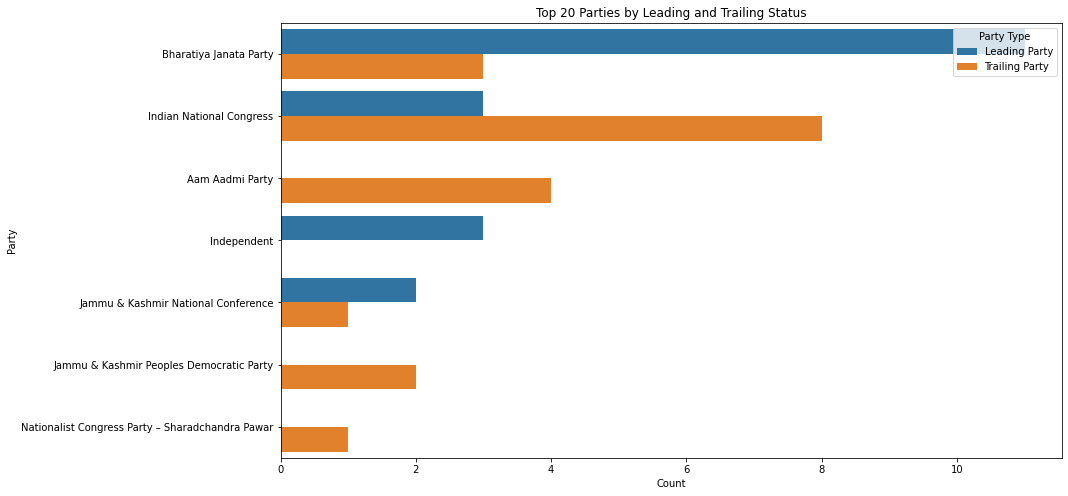

In [25]:
def leading_vs_trailing_parties(df, n=20):
    leading_trailing = df.melt(id_vars=['Constituency'], value_vars=['Leading Party', 'Trailing Party'], 
                               var_name='Party Type', value_name='Party')
    top_n_parties = leading_trailing['Party'].value_counts().index[:n]
    leading_trailing = leading_trailing[leading_trailing['Party'].isin(top_n_parties)]
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Party', hue='Party Type', data=leading_trailing, order=top_n_parties)
    plt.title(f'Top {n} Parties by Leading and Trailing Status')
    plt.xlabel('Count')
    plt.ylabel('Party')
    plt.show()

leading_vs_trailing_parties(df, n=20)

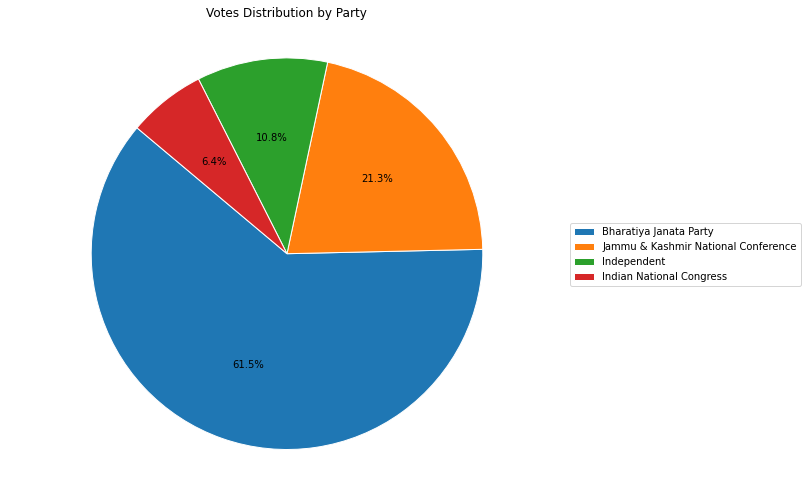

In [26]:
# Group by 'Leading Party' and sum the 'Margin'
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

plt.show()

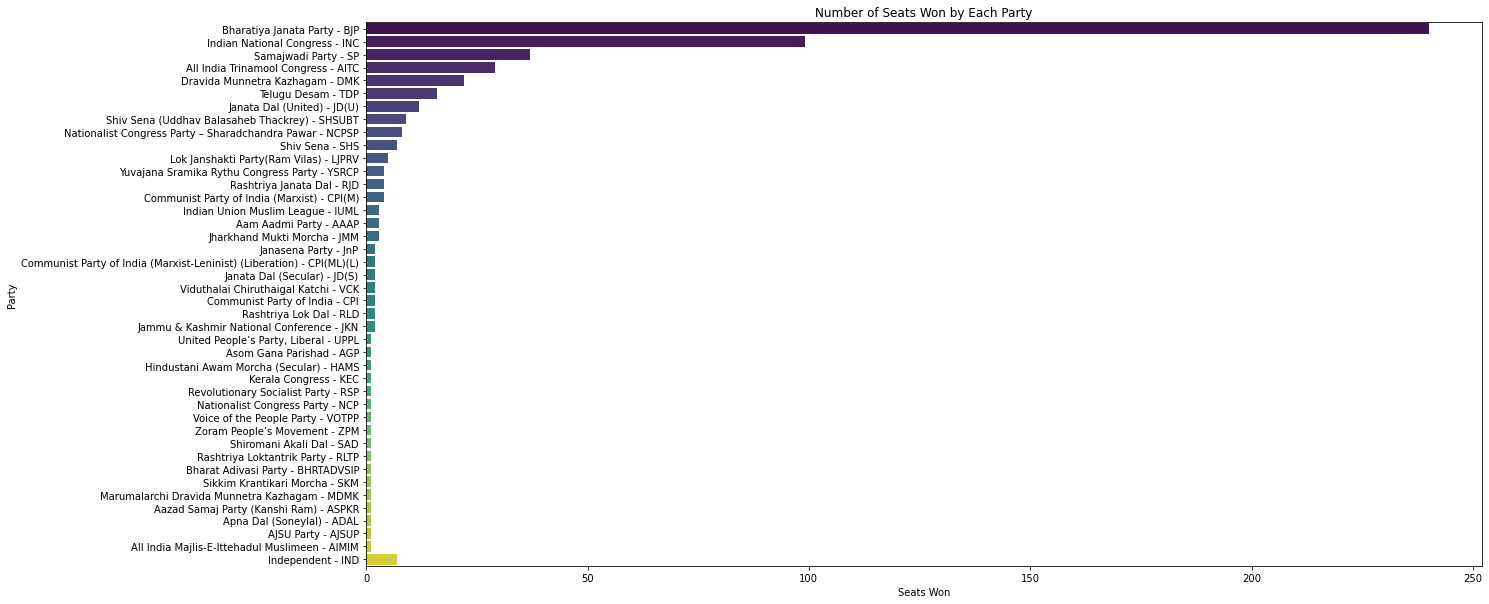

In [27]:

data = {
    "Party": [
        "Bharatiya Janata Party - BJP", "Indian National Congress - INC", "Samajwadi Party - SP",
        "All India Trinamool Congress - AITC", "Dravida Munnetra Kazhagam - DMK", "Telugu Desam - TDP",
        "Janata Dal (United) - JD(U)", "Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT",
        "Nationalist Congress Party – Sharadchandra Pawar - NCPSP", "Shiv Sena - SHS",
        "Lok Janshakti Party(Ram Vilas) - LJPRV", "Yuvajana Sramika Rythu Congress Party - YSRCP",
        "Rashtriya Janata Dal - RJD", "Communist Party of India (Marxist) - CPI(M)", 
        "Indian Union Muslim League - IUML", "Aam Aadmi Party - AAAP", "Jharkhand Mukti Morcha - JMM",
        "Janasena Party - JnP", "Communist Party of India (Marxist-Leninist) (Liberation) - CPI(ML)(L)",
        "Janata Dal (Secular) - JD(S)", "Viduthalai Chiruthaigal Katchi - VCK", "Communist Party of India - CPI",
        "Rashtriya Lok Dal - RLD", "Jammu & Kashmir National Conference - JKN", "United People’s Party, Liberal - UPPL",
        "Asom Gana Parishad - AGP", "Hindustani Awam Morcha (Secular) - HAMS", "Kerala Congress - KEC",
        "Revolutionary Socialist Party - RSP", "Nationalist Congress Party - NCP", "Voice of the People Party - VOTPP",
        "Zoram People’s Movement - ZPM", "Shiromani Akali Dal - SAD", "Rashtriya Loktantrik Party - RLTP",
        "Bharat Adivasi Party - BHRTADVSIP", "Sikkim Krantikari Morcha - SKM", "Marumalarchi Dravida Munnetra Kazhagam - MDMK",
        "Aazad Samaj Party (Kanshi Ram) - ASPKR", "Apna Dal (Soneylal) - ADAL", "AJSU Party - AJSUP",
        "All India Majlis-E-Ittehadul Muslimeen - AIMIM", "Independent - IND"
    ],
    "Won": [
        240, 99, 37, 29, 22, 16, 12, 9, 8, 7, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot number of seats won by each party
plt.figure(figsize=(20, 10))
sns.barplot(x='Won', y='Party', data=df, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.show()



In [38]:
top_10_parties = df.head(10)
fig = px.pie(top_10_parties, names='Party', values='Won', title="Top 10 Parties by Seats Won")
fig.show()


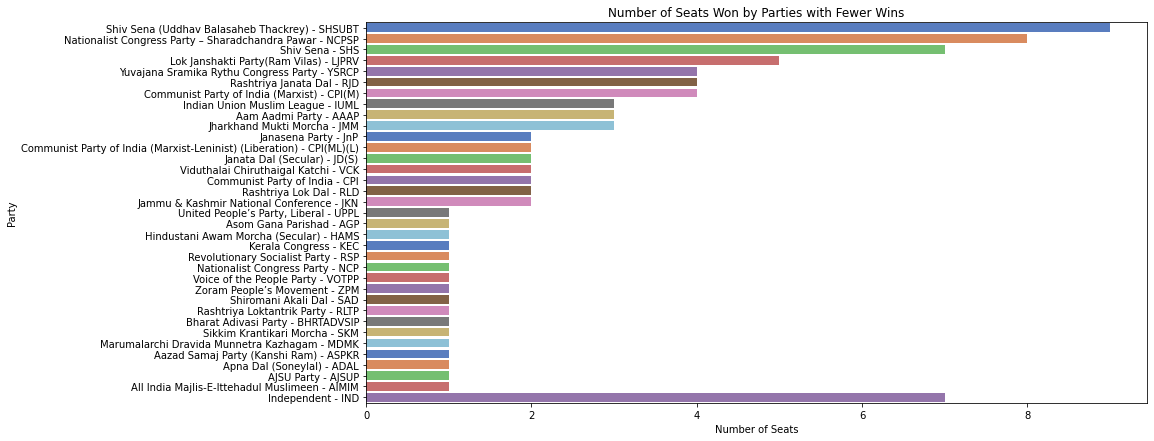

In [39]:
few_wins_parties = df[df['Won'] < 10]
plt.figure(figsize=(14, 7))
sns.barplot(x='Won', y='Party', data=few_wins_parties, palette='muted')
plt.title('Number of Seats Won by Parties with Fewer Wins')
plt.xlabel('Number of Seats')
plt.ylabel('Party')
plt.show()

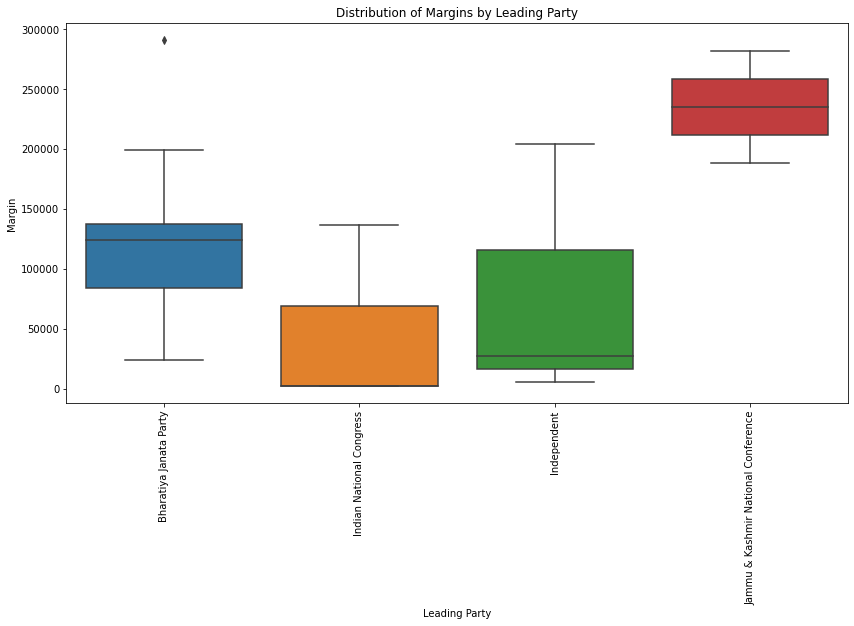

In [68]:
# Box Plot: Distribution of margins by leading party
plt.figure(figsize=(14, 7))
sns.boxplot(x='Leading Party', y='Margin', data=df)
plt.title('Distribution of Margins by Leading Party')
plt.xlabel('Leading Party')
plt.ylabel('Margin')
plt.xticks(rotation=90)
plt.show()


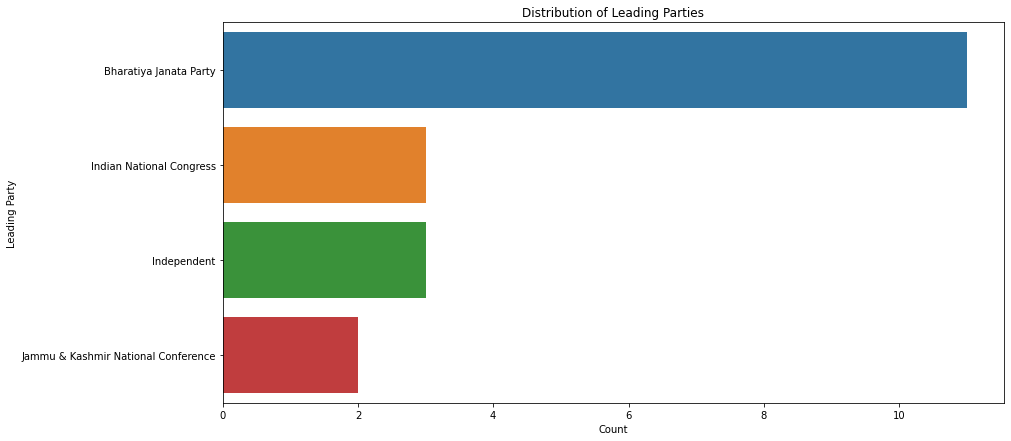

In [67]:
plt.figure(figsize=(14, 7))
sns.countplot(y='Leading Party', data=df, order=df['Leading Party'].value_counts().index)
plt.title('Distribution of Leading Parties')
plt.xlabel('Count')
plt.ylabel('Leading Party')
plt.show()

In [36]:
df.info

<bound method DataFrame.info of                                                 Party  Won
0                        Bharatiya Janata Party - BJP  240
1                      Indian National Congress - INC   99
2                                Samajwadi Party - SP   37
3                 All India Trinamool Congress - AITC   29
4                     Dravida Munnetra Kazhagam - DMK   22
5                                  Telugu Desam - TDP   16
6                         Janata Dal (United) - JD(U)   12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9
8   Nationalist Congress Party – Sharadchandra Paw...    8
9                                     Shiv Sena - SHS    7
10             Lok Janshakti Party(Ram Vilas) - LJPRV    5
11      Yuvajana Sramika Rythu Congress Party - YSRCP    4
12                         Rashtriya Janata Dal - RJD    4
13        Communist Party of India (Marxist) - CPI(M)    4
14                  Indian Union Muslim League - IUML    3
15                      

In [60]:
df.info

<bound method DataFrame.info of                  Constituency Const. No.          Leading Candidate  \
0   Andaman & Nicobar Islands          1            BISHNU PADA RAY   
1                  Chandigarh          1              MANISH TEWARI   
2        Dadar & Nagar Haveli          2   DELKAR KALABEN MOHANBHAI   
3                 Daman & Diu          1   PATEL UMESHBHAI BABUBHAI   
4               Chandni Chowk          1         PRAVEEN KHANDELWAL   
5                  East Delhi          3             HARSH MALHOTRA   
6                   New Delhi          4             BANSURI SWARAJ   
7            North-East Delhi          2               MANOJ TIWARI   
8            North-West Delhi          5        YOGENDER CHANDOLIYA   
9                 South Delhi          7       RAMVIR SINGH BIDHURI   
10                 West Delhi          6         KAMALJEET SEHRAWAT   
11                Lakshadweep          1  MUHAMMED HAMDULLAH SAYEED   
12                 PUDUCHERRY          1     

In [61]:
df

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin
0,Andaman & Nicobar Islands,1,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396
1,Chandigarh,1,MANISH TEWARI,Indian National Congress,SANJAY TANDON,Bharatiya Janata Party,2504
2,Dadar & Nagar Haveli,2,DELKAR KALABEN MOHANBHAI,Bharatiya Janata Party,AJIT RAMJIBHAI MAHALA,Indian National Congress,57584
3,Daman & Diu,1,PATEL UMESHBHAI BABUBHAI,Independent,LALUBHAI BABUBHAI PATEL,Bharatiya Janata Party,6225
4,Chandni Chowk,1,PRAVEEN KHANDELWAL,Bharatiya Janata Party,JAI PRAKASH AGARWAL,Indian National Congress,89325
5,East Delhi,3,HARSH MALHOTRA,Bharatiya Janata Party,KULDEEP KUMAR (MONU),Aam Aadmi Party,93663
6,New Delhi,4,BANSURI SWARAJ,Bharatiya Janata Party,SOMNATH BHARTI,Aam Aadmi Party,78370
7,North-East Delhi,2,MANOJ TIWARI,Bharatiya Janata Party,KANHAIYA KUMAR,Indian National Congress,138778
8,North-West Delhi,5,YOGENDER CHANDOLIYA,Bharatiya Janata Party,UDIT RAJ,Indian National Congress,290849
9,South Delhi,7,RAMVIR SINGH BIDHURI,Bharatiya Janata Party,SAHI RAM,Aam Aadmi Party,124333


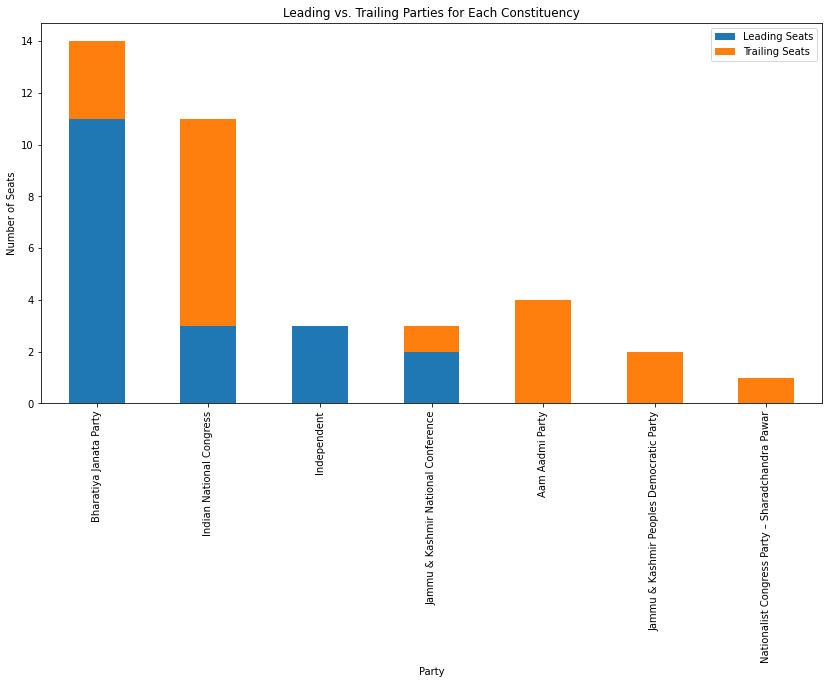

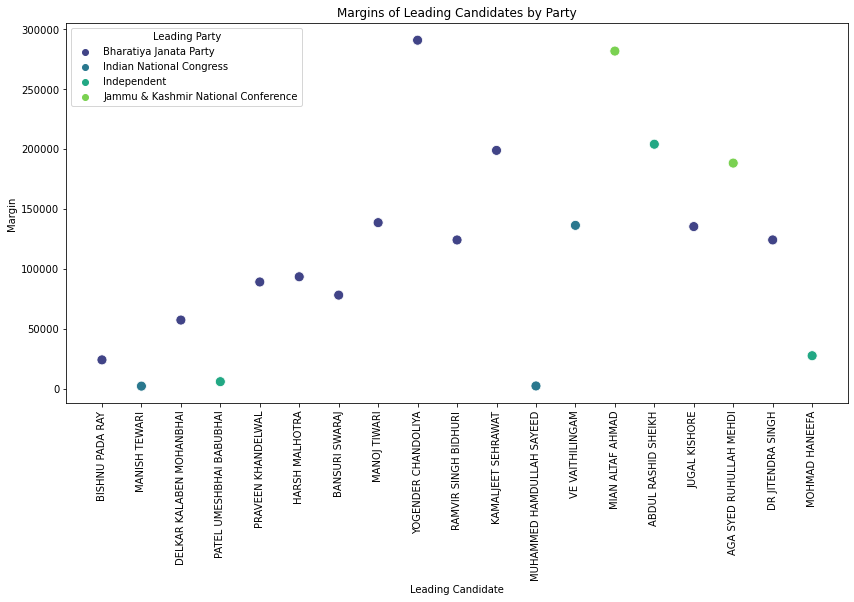

In [65]:
# Stacked Bar Chart: Leading vs. Trailing parties for each constituency
leading_parties = df['Leading Party'].value_counts().reset_index()
leading_parties.columns = ['Party', 'Seats']
trailing_parties = df['Trailing Party'].value_counts().reset_index()
trailing_parties.columns = ['Party', 'Seats']

# Merging leading and trailing party data
combined_parties = pd.merge(leading_parties, trailing_parties, on='Party', how='outer').fillna(0)
combined_parties.columns = ['Party', 'Leading Seats', 'Trailing Seats']
combined_parties = combined_parties.sort_values(by='Leading Seats', ascending=False)

# Plotting the stacked bar chart
combined_parties.set_index('Party').plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Leading vs. Trailing Parties for Each Constituency')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.show()

# Scatter Plot: Relationship between leading and trailing parties' margins
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Leading Candidate', y='Margin', hue='Leading Party', palette='viridis', s=100)
plt.title('Margins of Leading Candidates by Party')
plt.xlabel('Leading Candidate')
plt.ylabel('Margin')
plt.xticks(rotation=90)
plt.legend(title='Leading Party')
plt.show()

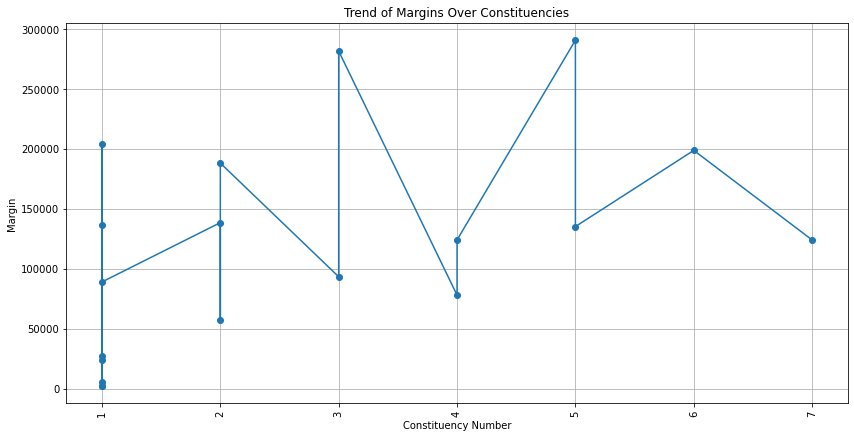

In [70]:

# Sort dataframe by 'Const. No.'
df_sorted = df.sort_values(by='Const. No.')

# Line Plot: Margin trend over constituencies
plt.figure(figsize=(14, 7))
plt.plot(df_sorted['Const. No.'], df_sorted['Margin'], marker='o', linestyle='-')
plt.title('Trend of Margins Over Constituencies')
plt.xlabel('Constituency Number')
plt.ylabel('Margin')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()